# Problem Statement :
# Analyse monthly household electricity usage data to understand which appliances contribute most to the electricity bill, find trends, and suggest data-backed recommendations to reduce the bill.

In [37]:
#import neccessary libraries
import pandas as pd
df = pd.read_csv('/content/electricity.csv')
print(df.head())
print(df.info())
print(df.describe())
print(df.columns)

      Month  Units_Used  Bill_Amount  People  Fan_Hours  AC_Hours  \
0  Jan 2024         200          878       4       1079         0   
1  Feb 2024         201          757       4       1070         0   
2  Mar 2024         385         1747       4       1359       109   
3  Apr 2024         583         2243       4       1744       221   
4  May 2024         670         3122       4       1478       292   

   Fridge_Watt  Washing_Hours  Cooking_Mins      Comments  
0          160              4            92  Cool weather  
1          160              6           108  Cool weather  
2          160              4            91      Moderate  
3          160              6            85     Hot month  
4          160              6           107     Hot month  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          12 non-null     

Data cleaning

In [13]:
df["Month"] = pd.to_datetime(df["Month"], format="%b %Y")
df["Cooking_Hours"] = df["Cooking_Mins"] / 60
df.head()

,Month,Units_Used,Bill_Amount,People,Fan_Hours,AC_Hours,Fridge_Watt,Washing_Hours,Cooking_Mins,Comments,Cooking_Hours
0,2024-01-01,200,878,4,1079,0,160,4,92,Cool weather,1.533333
1,2024-02-01,201,757,4,1070,0,160,6,108,Cool weather,1.800000
2,2024-03-01,385,1747,4,1359,109,160,4,91,Moderate,1.516667
3,2024-04-01,583,2243,4,1744,221,160,6,85,Hot month,1.416667
4,2024-05-01,670,3122,4,1478,292,160,6,107,Hot month,1.783333


 Feature Engineering

In [23]:
#fridge consumption 40% of time
df["Fridge_Consumption_kWh"] = (df["Fridge_Watt"] * 24 * 30 * 0.4) / 1000

In [22]:
# Cost per unit
df["Cost_Per_Unit"] = df["Bill_Amount"] / df["Units_Used"]

In [24]:
# Montly change in usage
df["Monthly_Change_%"] = df["Units_Used"].pct_change().fillna(0) * 100

In [25]:
# Estimated consumption
df["Fan_kWh"] = df["Fan_Hours"] * 0.075
df["AC_kWh"] = df["AC_Hours"] * 1.5
df["Washing_kWh"] = df["Washing_Hours"] * 0.5
df["Cooking_kWh"] = df["Cooking_Hours"] * 1.8

In [27]:
df["Total_Estimated_Usage_kWh"] = df[["Fan_kWh", "AC_kWh", "Washing_kWh", "Cooking_kWh", "Fridge_Consumption_kWh"]].sum(axis=1)

# Appliance share %
for col in ["Fan_kWh", "AC_kWh", "Washing_kWh", "Cooking_kWh", "Fridge_Consumption_kWh"]:
    df[col.replace("_kWh", "_%")] = df[col] / df["Total_Estimated_Usage_kWh"] * 100

EDA

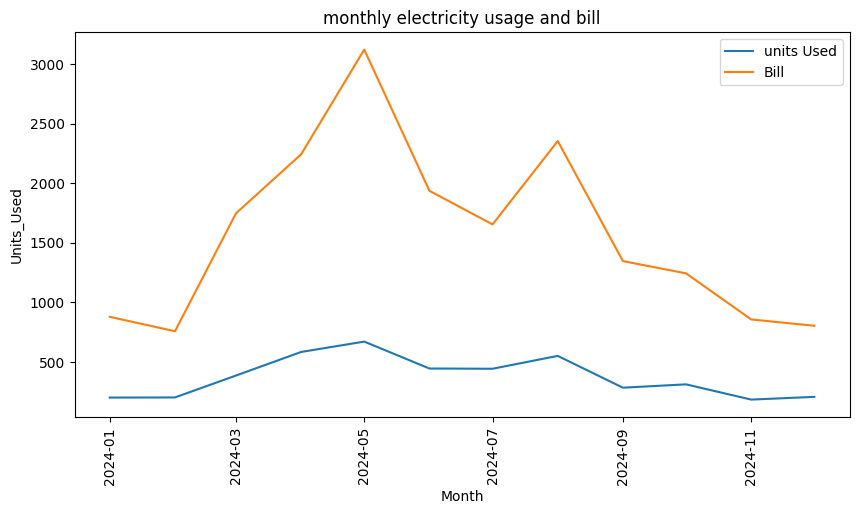

In [29]:
# 📈 Monthly Usage and Bill Trends

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.lineplot(x="Month", y="Units_Used", data=df, label="units Used")
sns.lineplot(x="Month", y="Bill_Amount", data=df, label="Bill")
plt.title("monthly electricity usage and bill")
plt.xticks(rotation=90)
plt.legend()
plt.show()

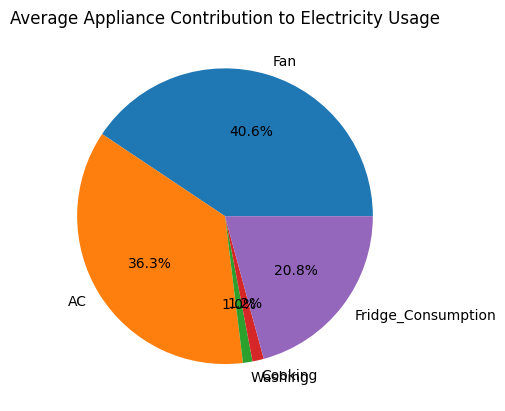

In [30]:
# 📉 Appliance Contribution

avg = df[["Fan_%", "AC_%", "Washing_%", "Cooking_%", "Fridge_Consumption_%"]].mean()
plt.pie(avg, labels=avg.index.str.replace("_%", ""), autopct='%1.1f%%')
plt.title("Average Appliance Contribution to Electricity Usage")
plt.show()

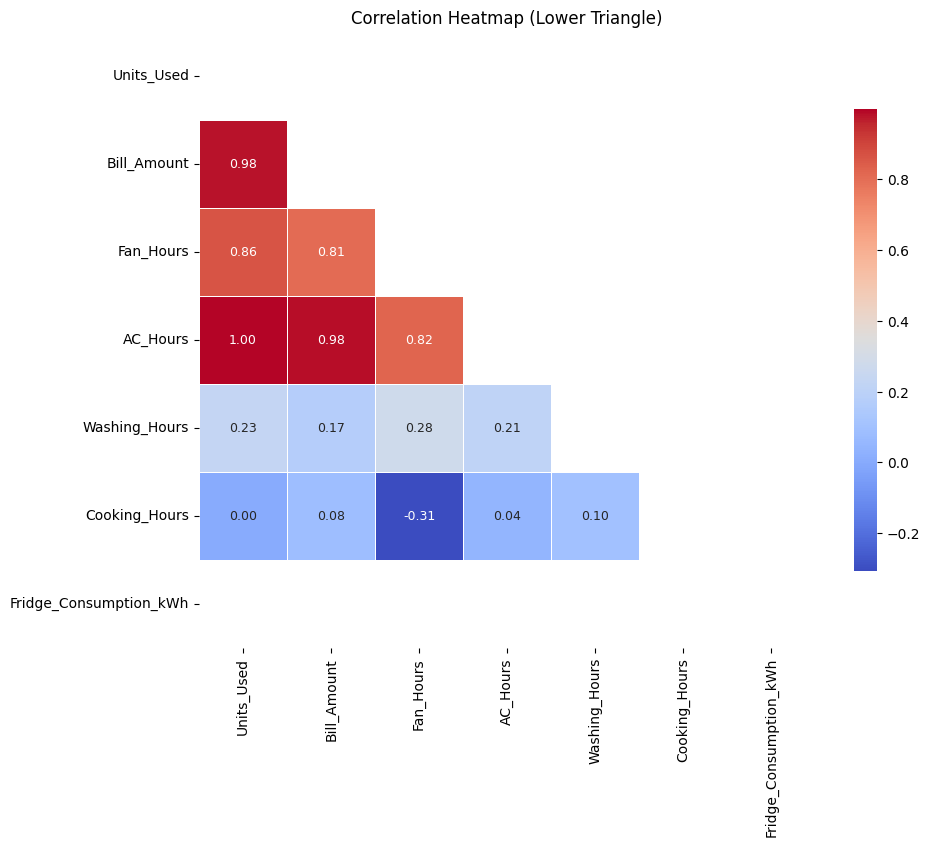

In [36]:
# Correlation Matrix
import numpy as np
cols = ['Units_Used','Bill_Amount','Fan_Hours','AC_Hours','Washing_Hours','Cooking_Hours','Fridge_Consumption_kWh']
num_df = df[cols]
corr = num_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', mask=mask, square=True, linewidths=.5, cbar_kws={"shrink": .75}, annot_kws={"size":9})
plt.title("Correlation Heatmap (Lower Triangle)")
plt.show()